### Continous random variables

- Check: 
  - https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb
  - https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb#dci


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Uniform distribution

$$X\sim Unif(a, b)$$

$$a:= min(X)$$

$$b:= max(X)$$

![](https://i.imgur.com/nncfd7a.png)

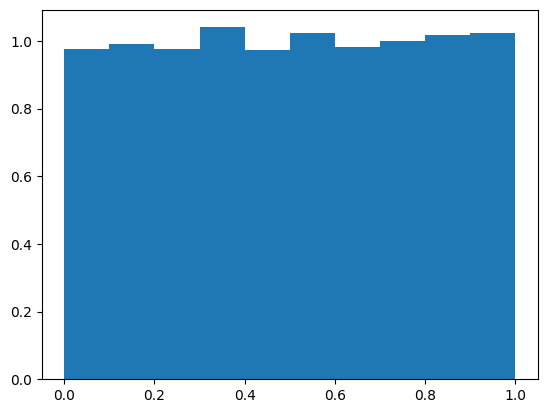

In [11]:
a, b = 0, 1

X = np.random.random(size=10000)*(b-a) + a
h = plt.hist(X, density=True)

# Normal distribution

$$X\sim N(\mu, \sigma)$$

- See: https://en.wikipedia.org/wiki/Normal_distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png)

(5.0, 0.9128709291752768)

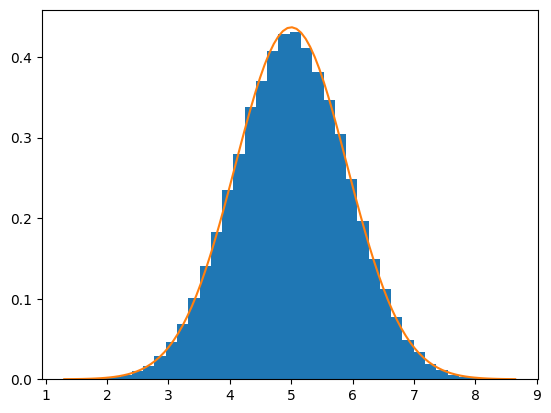

In [28]:
from scipy.stats import norm

a, b = 0, 1
mu_X = 1/2*(a+b), uniform distribution mean
var_X = 1/12*(b-a)**2 

n = 10  # sample size, random vector size (of the sum)
X = np.random.random(size=(100000,n))*(b-a) + a
sum_X = X.sum(axis=1)
h = plt.hist(sum_X, density=True, bins=40)
x_norm = np.linspace(sum_X.min(), sum_X.max(), 100)
plt.plot(x_norm, norm.pdf(x_norm, n*mu_X, np.sqrt(n*var_X)))
n*mu_X, np.sqrt(n*var_X)

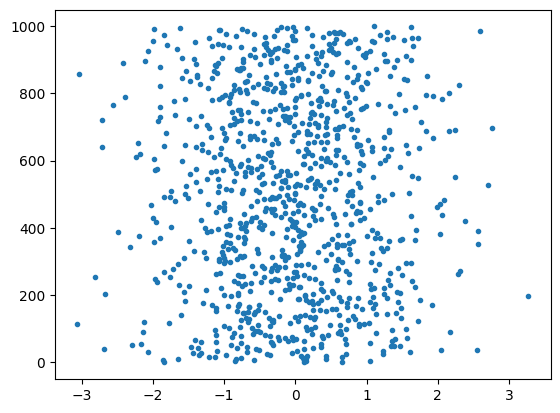

In [36]:
# loc is mu, scale is sigma
X = norm.rvs(size=1000, loc=0, scale=1)
plt.plot(X, range(1000), '.')

In [41]:
print(len(np.where((X >= -1) & (X <= 1))[0]))
print(len(np.where((X >= -2) & (X <= 2))[0]))
print(len(np.where((X >= -3) & (X <= 3))[0]))

683
952
997


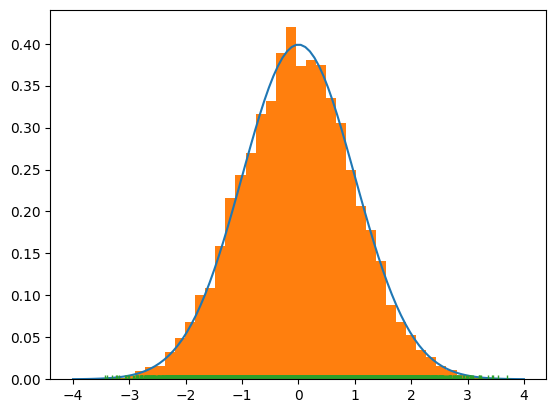

In [51]:
X = norm.rvs(size=10000, loc=0, scale=1)
mu = 0
sigma = 1
x = np.linspace(-4*sigma, 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma))
plt.hist(X, bins=40, density=True)
plt.plot(X, len(X)*[0], '+')

# Exponential distribution

- See: https://en.wikipedia.org/wiki/Exponential_distribution

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/1024px-Exponential_probability_density.svg.png)

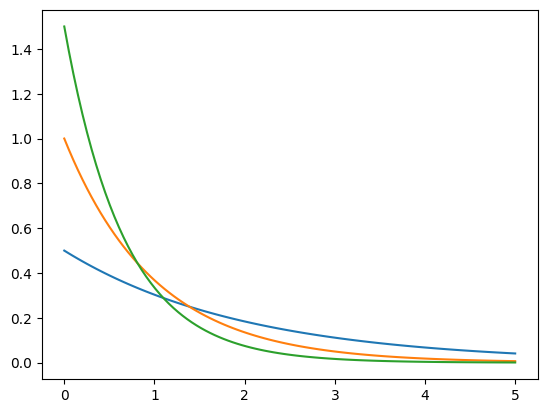

In [55]:
from scipy.stats import expon

x = np.linspace(0, 5, 100)
plt.plot(x, expon.pdf(x, scale=1/0.5))
plt.plot(x, expon.pdf(x, scale=1/1))
plt.plot(x, expon.pdf(x, scale=1/1.5))

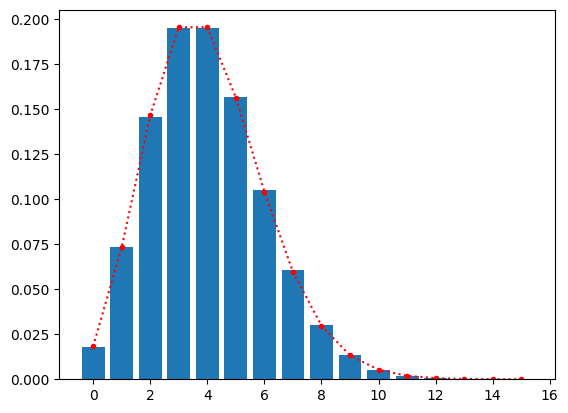

In [65]:
from scipy.stats import poisson

t = 1  # We will simulate 1 hour (continous space)
l = 4  # lambda = 4

def calls_received(l):
    a = [0.0]  # Start the watch
    while a[-1] < t:
        a += [a[-1] + expon.rvs(scale=1/l)]
    return len(a) - 2

Calls = [calls_received(l) for i in range(100000)]
xp, fxp = np.unique(Calls, return_counts=True)
plt.bar(xp, fxp/fxp.sum())
plt.plot(xp, poisson.pmf(xp, l), ':.r')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>